Applicazione delle architetture residuali e confronto
delle performance tra queste e modelli pienamente connessi.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Add, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [3]:
# pre-processing dei dataset

# normalizzazione
train_images = (train_images / 255)
test_images = (test_images / 255)

# appiattimento di ogni immagine da un array 28x28 ad un array di 784 pixel
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [4]:
# trasformazione delle label tramite hot-encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
# creazione del modello

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(784,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(10, activation='softmax'))

# compilazione del modello

model.compile(
  optimizer=Adam(learning_rate=0.005),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_23 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_24 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_25 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_26 (Dense)             (None, 16)               

In [17]:
history = model.fit(
    x=train_images, # training dataset
    y=train_labels, # training labels
    epochs=50,
    batch_size=512,
    validation_data=(
        test_images, # testing dataset
        test_labels  # testing labels
    )
)

Epoch 1/50
118/118 [==============================] - 1s 7ms/step - loss: 1.0618 - accuracy: 0.6115 - val_loss: 0.5139 - val_accuracy: 0.8441
Epoch 2/50
118/118 [==============================] - 1s 5ms/step - loss: 0.4403 - accuracy: 0.8669 - val_loss: 0.3861 - val_accuracy: 0.8851
Epoch 3/50
118/118 [==============================] - 1s 6ms/step - loss: 0.3290 - accuracy: 0.9022 - val_loss: 0.2986 - val_accuracy: 0.9148
Epoch 4/50
118/118 [==============================] - 1s 6ms/step - loss: 0.2777 - accuracy: 0.9185 - val_loss: 0.2990 - val_accuracy: 0.9141
Epoch 5/50
118/118 [==============================] - 1s 5ms/step - loss: 0.2589 - accuracy: 0.9244 - val_loss: 0.2618 - val_accuracy: 0.9258
Epoch 6/50
118/118 [==============================] - 1s 5ms/step - loss: 0.2281 - accuracy: 0.9333 - val_loss: 0.2334 - val_accuracy: 0.9345
Epoch 7/50
118/118 [==============================] - 1s 5ms/step - loss: 0.2177 - accuracy: 0.9359 - val_loss: 0.2595 - val_accuracy: 0.9231
Epoch 

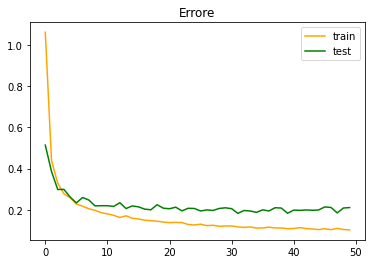

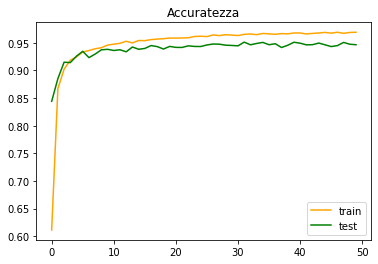

In [18]:
# visualizzazione su grafico
# dell'andamento dell'addestramento

# errore modello
plt.plot(history.history['loss'], color='orange', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
plt.title('Errore')
plt.legend()
plt.show()

# accuratezza modello
plt.plot(history.history['accuracy'], color='orange', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.title('Accuratezza')
plt.legend()
plt.show()

In [19]:
evaluations = model.evaluate(
  test_images,
  test_labels
)

for i in range(0, len(model.metrics_names)):
    print("{} -> {}".format(model.metrics_names[i], evaluations[i]))

313/313 [==============================] - 1s 2ms/step - loss: 0.2110 - accuracy: 0.9464
loss -> 0.21096345782279968
accuracy -> 0.946399986743927


In [20]:
input = Input(shape=(train_images.shape[1]))

'''
dense_16_relu = Dense(units=16, activation='relu')
'''


dense = dense_16_relu(input)
dense2 = Dense(units=16, activation='relu')(dense)
dense3 = Dense(units=16)(dense2)

res1 = Add()([dense, dense3])
res1 = Activation('relu')(res1)

dense4 = Dense(units=16, activation='relu')(res1)
dense5 = Dense(units=16, activation='relu')(dense4)
dense6 = Dense(units=16)(dense5)

res2 = Add()([dense4, dense6])
res2 = Activation('relu')(res2)

dense7 = Dense(units=16, activation='relu')(res2)
dense8 = Dense(units=16, activation='relu')(dense7)
dense9 = Dense(units=16)(dense8)

res3 = Add()([dense7, dense9])
res3 = Activation('relu')(res3)

output = Dense(units=10, activation='softmax')(res3)

model = tf.keras.models.Model(
    inputs=[input],
    outputs=[output],
    name='ResNet'
)
# compilazione del modello

model.compile(
  optimizer=Adam(lr=0.005),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.summary()

Model: "ResNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_30 (Dense)                (None, 16)           12560       input_1[0][0]                    
__________________________________________________________________________________________________
dense_31 (Dense)                (None, 16)           272         dense_30[0][0]                   
__________________________________________________________________________________________________
dense_32 (Dense)                (None, 16)           272         dense_31[0][0]                   
_____________________________________________________________________________________________

In [21]:
history_res = model.fit(
    x=train_images, # training dataset
    y=train_labels, # training labels
    epochs=50,
    batch_size=512,
    validation_data=(
        test_images, # testing dataset
        test_labels  # testing labels
    )
)

Epoch 1/50
118/118 [==============================] - 1s 7ms/step - loss: 0.8348 - accuracy: 0.7246 - val_loss: 0.3688 - val_accuracy: 0.8949
Epoch 2/50
118/118 [==============================] - 1s 6ms/step - loss: 0.3108 - accuracy: 0.9110 - val_loss: 0.2720 - val_accuracy: 0.9234
Epoch 3/50
118/118 [==============================] - 1s 6ms/step - loss: 0.2479 - accuracy: 0.9285 - val_loss: 0.2473 - val_accuracy: 0.9312
Epoch 4/50
118/118 [==============================] - 1s 6ms/step - loss: 0.2091 - accuracy: 0.9396 - val_loss: 0.2254 - val_accuracy: 0.9379
Epoch 5/50
118/118 [==============================] - 1s 5ms/step - loss: 0.1928 - accuracy: 0.9441 - val_loss: 0.2088 - val_accuracy: 0.9420
Epoch 6/50
118/118 [==============================] - 1s 5ms/step - loss: 0.1776 - accuracy: 0.9485 - val_loss: 0.2010 - val_accuracy: 0.9421
Epoch 7/50
118/118 [==============================] - 1s 5ms/step - loss: 0.1660 - accuracy: 0.9511 - val_loss: 0.2241 - val_accuracy: 0.9388
Epoch 

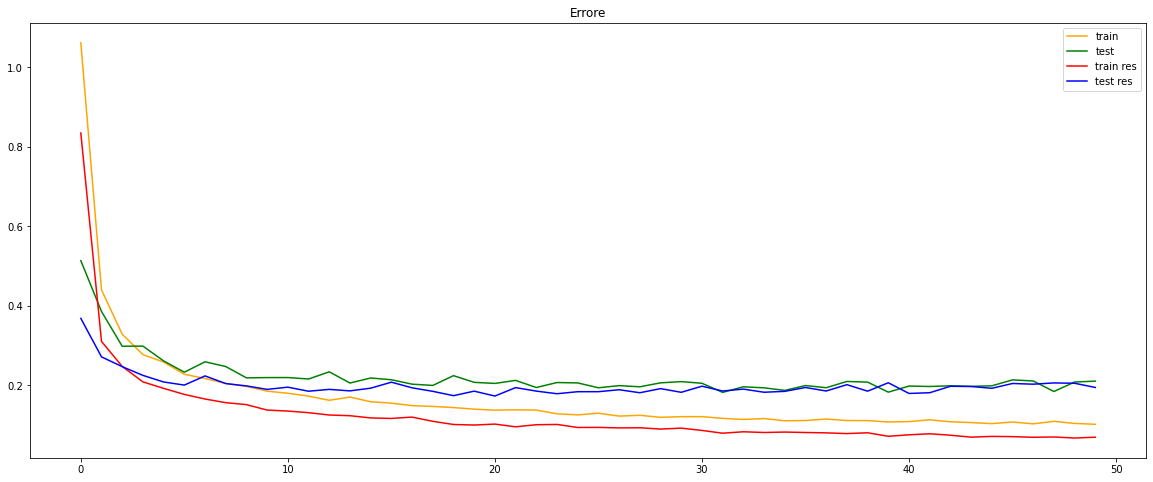

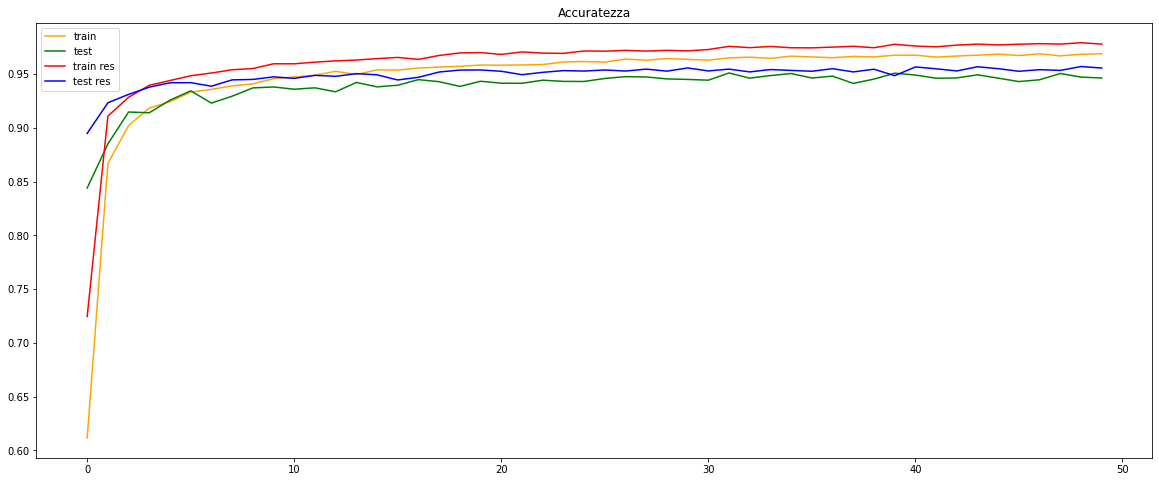

In [22]:
# visualizzazione su grafico
# dell'andamento dell'addestramento

# errore modello
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'], color='orange', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
plt.plot(history_res.history['loss'], color='red', label='train res')
plt.plot(history_res.history['val_loss'], color='blue', label='test res')
plt.title('Errore')
plt.legend()
plt.show()

# accuratezza modello
plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'], color='orange', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.plot(history_res.history['accuracy'], color='red', label='train res')
plt.plot(history_res.history['val_accuracy'], color='blue', label='test res')
plt.title('Accuratezza')
plt.legend()
plt.show()

In [23]:
evaluations = model.evaluate(
  test_images,
  test_labels
)

for i in range(0, len(model.metrics_names)):
    print("{} -> {}".format(model.metrics_names[i], evaluations[i]))

313/313 [==============================] - 1s 3ms/step - loss: 0.1951 - accuracy: 0.9557
loss -> 0.19506192207336426
accuracy -> 0.9556999802589417
